<a href="https://colab.research.google.com/github/sagar9926/FlowerClassification/blob/master/horizontalFlip/Copy_of_Flower_category_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab library to upload files to notebook
#from google.colab import files

# Install Kaggle library
!pip install  kaggle

from keras import regularizers
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
#print(os.listdir("../input/flower-recognition-he/data"))
from tqdm import tqdm
from keras.preprocessing import image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
cd ..

/


In [3]:
cd content

/content


In [4]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"agrawalsagar178","key":"3e3a262202b2c8a388745d9de04e10af"}'}

In [5]:
!ls

 data			    'kaggle (1).json'   sample_data
 flower-recognition-he.zip   kaggle.json


In [6]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 71 Aug 10 14:12 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
! kaggle datasets download -d rednivrug/flower-recognition-he -p /content

#kaggle kernels pull rednivrug/flower-recogition-hackerearth-ensemble

flower-recognition-he.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
# Unzip the data
!unzip flower-recognition-he.zip

Archive:  flower-recognition-he.zip
replace data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [11]:
# Let's check the labels
train_category = pd.read_csv("data/train.csv")
train_category.category.value_counts()

51     582
77     567
46     441
73     438
89     414
74     387
81     375
94     366
88     348
78     309
83     297
43     294
41     288
95     288
75     270
58     258
82     252
60     246
56     246
76     243
37     243
80     237
65     231
72     216
53     210
44     210
23     207
96     207
50     207
12     198
      ... 
64     117
61     114
19     111
15     111
49     111
100    111
13     111
14     108
102    108
93     105
9      105
33     105
32     102
6      102
10     102
35      99
67      96
24      96
39      93
79      93
25      93
26      93
16      93
34      90
3       90
21      90
7       90
1       90
27      90
45      90
Name: category, Length: 102, dtype: int64

In [12]:
#%cd content
%cd data
!ls

/content/data
sample_submission.csv  test  test.csv  train  train.csv


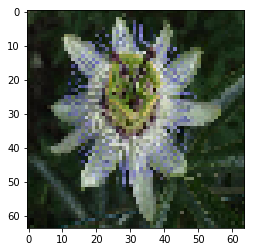

In [13]:

img = image.load_img('../data/train/'+train_category['image_id'][0].astype('str')+'.jpg', target_size=(64,64,1))
imgplot = plt.imshow(img)

In [14]:
#Next, we will read all the training images, store them in a list, 
#and finally convert #that list into a numpy array.

train_image = []
for i in tqdm(range(train_category.shape[0])):
    img = image.load_img('../data/train/'+train_category['image_id'][i].astype('str')+'.jpg', target_size=(64,64,1))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)




100%|██████████| 18540/18540 [01:22<00:00, 223.82it/s]


In [0]:
L  = list(train_category.category)

In [0]:
X[0]

array([[[0.21176471, 0.25882354, 0.16470589],
        [0.21568628, 0.24313726, 0.17254902],
        [0.14509805, 0.19607843, 0.1254902 ],
        ...,
        [0.11372549, 0.17254902, 0.09019608],
        [0.14509805, 0.21960784, 0.13333334],
        [0.13333334, 0.20784314, 0.12156863]],

       [[0.17254902, 0.24705882, 0.16078432],
        [0.13725491, 0.21176471, 0.13725491],
        [0.09019608, 0.14901961, 0.07450981],
        ...,
        [0.11764706, 0.16470589, 0.08627451],
        [0.14117648, 0.21568628, 0.12941177],
        [0.11372549, 0.1882353 , 0.10196079]],

       [[0.20784314, 0.26666668, 0.14509805],
        [0.11764706, 0.18039216, 0.07843138],
        [0.07058824, 0.07450981, 0.04313726],
        ...,
        [0.07450981, 0.14117648, 0.06666667],
        [0.10588235, 0.18039216, 0.09411765],
        [0.1764706 , 0.27058825, 0.1764706 ]],

       ...,

       [[0.05882353, 0.06666667, 0.04705882],
        [0.05490196, 0.0627451 , 0.04313726],
        [0.07058824, 0

In [0]:
X.shape

(18540, 64, 64, 3)

In [0]:
y=train_category['category'].values
y = to_categorical(y)

In [0]:
len(y[0])

103

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25,stratify = L )

In [0]:
datagen = ImageDataGenerator(featurewise_center=True, samplewise_center=True,horizontal_flip = True,vertical_flip = True)
datagen.fit(X_train)

val_datagen = ImageDataGenerator(featurewise_center=True, samplewise_center=True)
val_datagen.fit(X_train)


# demonstrate effect on entire training dataset
train_iterator = datagen.flow(X_train, y_train, batch_size=128, shuffle=False) #what is the use of shuffle
val_iterator = val_datagen.flow(X_test, y_test, batch_size=64, shuffle=False)

In [152]:
#Test accuracy 67

# Define the model
model1 = Sequential()
model1.add(Convolution2D(32, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(64, 64, 3)))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.05))

model1.add(Convolution2D(32, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(64, 64, 3)))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.05))

model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.05))

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Convolution2D(32, 1, 1))


model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.05))

model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.05))

model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.05))

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.35))

model1.add(Convolution2D(32, 1, 1))


model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.05))

model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.05))

model1.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.05))

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))

model1.add(Convolution2D(103, 2, 2))

model1.add(AveragePooling2D(pool_size = (4,4)))
model1.add(Flatten())


model1.add(Activation('softmax'))

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(64, 64, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(64, 64, 3..., padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., 

In [141]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
activation_61 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_55 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
dropout_55 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
activation_62 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_56 (Batc (None, 64, 64, 32)        128       
__________

In [0]:
X_test.shape

(4635, 64, 64, 3)

In [0]:
datagen = ImageDataGenerator(featurewise_center=True, samplewise_center=True,vertical_flip = True,preprocessing_function=get_random_eraser(v_l=0, v_h=1),rotation_range=10,width_shift_range=0.2,
    height_shift_range=0.2)
datagen.fit(X_train)

val_datagen = ImageDataGenerator(featurewise_center=True, samplewise_center=True)
val_datagen.fit(X_train)


# demonstrate effect on entire training dataset
train_iterator = datagen.flow(X_train, y_train, batch_size=256, shuffle=False) #what is the use of shuffle
val_iterator = val_datagen.flow(X_test, y_test, batch_size=64, shuffle=False)

In [80]:
!git clone https://github.com/bckenstler/CLR.git

Cloning into 'CLR'...
remote: Enumerating objects: 244, done.
remote: Total 244 (delta 0), reused 0 (delta 0), pack-reused 244
Receiving objects: 100% (244/244), 1.37 MiB | 2.89 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [97]:
cd test

/content/data/test


In [0]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import *
from clr_callback import *
from keras.optimizers import SGD


In [0]:
# You are using the triangular learning rate policy and
#  base_lr (initial learning rate which is the lower boundary in the cycle) is 0.1
clr_triangular = CyclicLR(mode='triangular')
model1.compile(optimizer=SGD(0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
 mcp_save = ModelCheckpoint('../data/mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

In [109]:
cd ..

/content/data


In [0]:
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [154]:
#103
model1.fit_generator(train_iterator, steps_per_epoch=55, verbose=1,nb_epoch=200,
                    validation_data=val_iterator,validation_steps = 71,callbacks=[mcp_save,clr_triangular] )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=55, verbose=1, validation_data=<keras_pre..., validation_steps=71, callbacks=[<keras.ca..., epochs=200)`
  


Epoch 1/200
55/55 [==============================] - 44s 802ms/step - loss: 3.9492 - acc: 0.1193 - val_loss: 4.7429 - val_acc: 0.1591
Epoch 2/200
55/55 [==============================] - 38s 696ms/step - loss: 3.1236 - acc: 0.2380 - val_loss: 3.8586 - val_acc: 0.2276
Epoch 3/200
55/55 [==============================] - 38s 693ms/step - loss: 2.7710 - acc: 0.2983 - val_loss: 3.9941 - val_acc: 0.2665
Epoch 4/200
55/55 [==============================] - 38s 693ms/step - loss: 2.5582 - acc: 0.3440 - val_loss: 4.5074 - val_acc: 0.2248
Epoch 5/200
55/55 [==============================] - 38s 694ms/step - loss: 2.3984 - acc: 0.3794 - val_loss: 6.6239 - val_acc: 0.1722
Epoch 6/200
55/55 [==============================] - 38s 694ms/step - loss: 2.2177 - acc: 0.4236 - val_loss: 4.4609 - val_acc: 0.2518
Epoch 7/200
55/55 [==============================] - 38s 693ms/step - loss: 2.0960 - acc: 0.4504 - val_loss: 3.7436 - val_acc: 0.3046
Epoch 8/200
55/55 [==============================] - 38s 691ms

KeyboardInterrupt: ignored

In [0]:
model1.load_weights(filepath = '../data/mdl_wts.hdf5')

In [0]:
datagen = ImageDataGenerator(featurewise_center=True, samplewise_center=True)
datagen.fit(X_train)

val_datagen = ImageDataGenerator(featurewise_center=True, samplewise_center=True)
val_datagen.fit(X_train)


# demonstrate effect on entire training dataset
train_iterator = datagen.flow(X_train, y_train, batch_size=128, shuffle=False) #what is the use of shuffle
val_iterator = val_datagen.flow(X_test, y_test, batch_size=64, shuffle=False)

In [0]:
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [168]:
#2 gave me 76.9
#thus total 105 epochs
model1.fit_generator(train_iterator, steps_per_epoch=109, verbose=1,nb_epoch=4,
                    validation_data=val_iterator,validation_steps = 71)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=109, verbose=1, validation_data=<keras_pre..., validation_steps=71, epochs=4)`
  


Epoch 1/4
109/109 [==============================] - 40s 367ms/step - loss: 2.0438 - acc: 0.6297 - val_loss: 2.9711 - val_acc: 0.5775
Epoch 2/4
109/109 [==============================] - 40s 366ms/step - loss: 1.2380 - acc: 0.8149 - val_loss: 1.4724 - val_acc: 0.7506
Epoch 3/4
109/109 [==============================] - 40s 366ms/step - loss: 1.0174 - acc: 0.8685 - val_loss: 1.3901 - val_acc: 0.7686
Epoch 4/4
109/109 [==============================] - 40s 365ms/step - loss: 0.9331 - acc: 0.8867 - val_loss: 1.2800 - val_acc: 0.7872


In [0]:
##Implementing CutOut
import cv2
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    #cutout
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img
    
    #Random Crop
    
    def random_crop(input_img, random_crop_size =(64,64)):
      # Note: image_data_format is 'channel_last'
      assert input_img.shape[2] == 3
      height, width = input_img.shape[0], input_img.shape[1]
      dy, dx = random_crop_size
      x = np.random.randint(0, width - dx + 1)
      y = np.random.randint(0, height - dy + 1)
      return input_img[y:(y+dy), x:(x+dx), :]
    
    
    def Horizontal_Flip(input_img):
      p0 = 0
      
      p_2 = np.random.rand()
      
      if p_2 > p0:
        return input_img
      else:
        return(cv2.flip(input_img,1))
      
    #Adding padding
    
    def padding(input_image):
      input_img = cv2.copyMakeBorder(input_image,0,4,4,0,cv2.BORDER_REPLICATE)
      return input_img
    
    
    def aggregate_all_augs(input_img):
      return eraser(Horizontal_Flip(random_crop(padding(input_img))))

    return aggregate_all_augs

    

#### Maximum accuracy achieved 85% in 17th epoch

In [47]:
df_test = pd.read_csv("../data/test.csv")
df_test['image_id'][0]

18540

In [48]:
test_image = []
for i in tqdm(range(df_test.shape[0])):
    img = image.load_img('../data/test/'+df_test['image_id'][i].astype('str')+'.jpg', target_size=(64,64,1))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

100%|██████████| 2009/2009 [00:09<00:00, 211.11it/s]


In [0]:
test[1].max()

1.0

In [0]:
test_datagen = ImageDataGenerator(featurewise_center=True, samplewise_center=True)
test_datagen.fit(X_train)





test_iterator = test_datagen.flow(test, batch_size=49, shuffle=False)
prediction = model1.predict_generator(test_iterator,steps =41)


In [0]:
prediction.shape

(2009, 103)

In [0]:
predict = [np.argmax(prediction[i]) for i in range(2009)]

In [171]:

df_prediction= pd.DataFrame({'category':predict})
df_prediction

,category
0,19
1,4
2,40
3,95
4,51
5,40
6,67
7,97
8,72
9,89


In [172]:
df_prediction.category.value_counts()

73     62
77     58
94     53
51     49
46     49
43     49
74     48
50     44
81     43
30     43
75     43
89     40
97     35
88     35
4      35
31     31
76     31
60     30
72     30
82     30
20     29
42     29
58     27
41     26
19     25
39     25
14     24
56     23
98     23
78     23
       ..
99     12
6      12
92     12
100    12
18     11
16     11
38     11
61     11
35     10
22     10
68     10
11      9
7       9
55      9
86      9
1       8
34      8
40      8
53      8
67      8
21      7
45      7
33      6
87      6
90      6
102     6
28      5
9       3
93      3
26      1
Name: category, Length: 102, dtype: int64

In [0]:
sample = pd.read_csv('../data/sample_submission.csv')

#sample['label'] = prediction
#sample.to_csv('sample_cnn.csv', header=True, index=False)

In [174]:
df_final= sample.iloc[:,[0]]
df_final=pd.concat([df_final,df_prediction],axis=1)
df_final.head()

,image_id,category
0,18540,19
1,18541,4
2,18542,40
3,18543,95
4,18544,51


In [0]:
pd.DataFrame(df_final).to_csv('myprediction_NN.csv',index = False)

In [0]:
from google.colab import files

files.download('myprediction_NN.csv')